# Image Classification with Deep CNN

---

Irem Arici, May 2024

## Installing dependencies

In [1]:
import tensorflow as tf
import os

/Users/iremarici/anaconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Removing dodgy images

In [4]:
import cv2
import imghdr
import matplotlib.pyplot as plt

In [5]:
# path for data directory

data_dir = "data"
image_exts = ["jpeg", "jpg", "bmp", "png"]

os.listdir(data_dir) # ['angry_people', 'bored_people', 'sad_people', 'happy_people'] are in the data directory

['angry_people', 'bored_people', '.DS_Store', 'sad_people', 'happy_people']

In [6]:
for image_class in os.listdir(data_dir):
    
    if os.path.isdir(os.path.join(data_dir, image_class)):
        
        for image in os.listdir(os.path.join(data_dir, image_class)):
            print(image)

image22.jpeg
BpeGVsX2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvbHIvczcwLXRlZGR5LTAxMTM2LWV5ZV8yLnBuZw.png
231106-anger-stock-mb-1441-8d0d27.jpg
Anger-pix-768x768.jpg
lovepik-an-angry-old-man-png-image_401101541_wh1200.png
610wSoPlkL._AC_UF10001000_QL80_.jpg
currency-person-bitcoin-angry-human-public-relations-necktie-anger-thumbnail.png
migration-DealingWithAngryPeopleIMGB1.jpg
depositphotos_65078645-stock-photo-group-of-unhappy-angry-people.jpg
kozzi-439500-couple_pointing_each_other-1774x1183.jpg
QE5I6L4GWOG7N7M42UDUW7N6FQ.jpg
pngtree-angry-people-png-image_3926749.jpg
d6ff3eb597e922f263e9b47e9476163f47e4b6d629cdd5e5685a66d9d5650624.jpg
MV5BYmU2ZjY0ODYtNjNiNy00Y2Q4LWFmMmItMjdjZWE5OWY1NjU2XkEyXkFqcGdeQXVyMjQ3Mjk1NA._V1_.jpg
Angry-people-2.jpg
pexels-keira-burton-6147403-1280x640.jpg
anger_ruining_898.jpg
Angry-black-man-Copy.jpg
png-transparent-angry-boy-emotion-young-man-anger-angry-boy-angry-man-person-teenager-thumbnail.png
png-transparent-boxing-man-people-an-angry-person-the-man.png
40-bigst

In [7]:
# Opening images that match extensions with cv2

for image_class in os.listdir(data_dir):
    if os.path.isdir(os.path.join(data_dir, image_class)): # check if file or directory
        
        for image in os.listdir(os.path.join(data_dir, image_class)):
            image_path = os.path.join(data_dir,image_class,image)
            
            try:
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                
                if tip not in image_exts:
                    print(f"Image not in extension list {image_path}")
                    os.remove(image_path)
                    
            except Exception as e:
                print(f"Issue with image {image_path}")

libpng warning: iCCP: known incorrect sRGB profile


#### *Example image from the directory*

In [8]:
img = cv2.imread(os.path.join("data", "happy_people", "happypeople-1024x679.jpg")) # outputs a np array

In [9]:
img.shape

(679, 1024, 3)

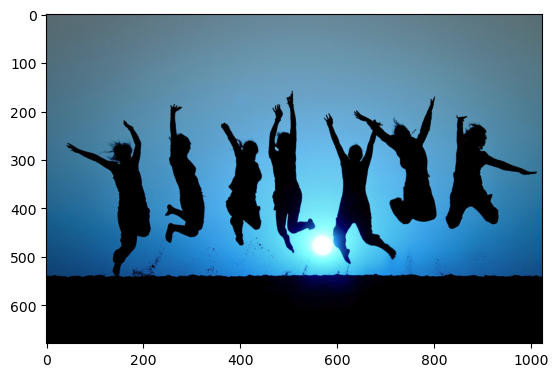

In [10]:
plt.imshow(img)
plt.show()

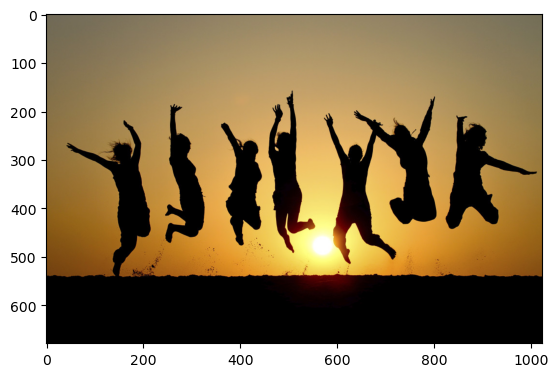

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # colors corrected 
plt.show()

## Loading data

In [12]:
import numpy as np

In [77]:
data = tf.keras.utils.image_dataset_from_directory("data") # Found 482 files belonging to 4 classes.

Found 319 files belonging to 2 classes.


In [78]:
data_iterator = data.as_numpy_iterator() # coverting to np to access data pipeline

In [80]:
batch = data_iterator.next() # get another batch
len(batch) # 2 parts, images and labels

2

In [81]:
batch[0].shape # gives batch size and image size, images represented as np arrays

(32, 256, 256, 3)

In [82]:
batch[1] # gives the labels

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int32)

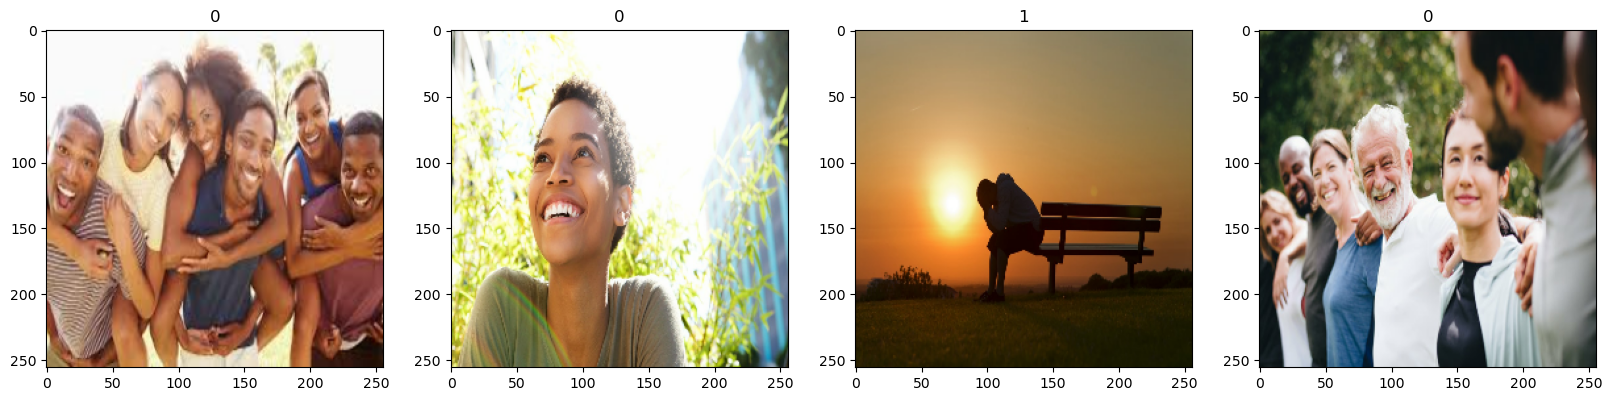

In [83]:
fig, ax = plt.subplots(ncols= 4, figsize = (20,20))

bfor idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

From the plot, we can see that 0 is for happy, and 1 is for sad.

## Preprocessing
---
Scaling & scraping data

We scale batches so that they have values between 0 and 1, instead of 0 and 255.

In [84]:
data = data.map(lambda x,y: (x/255, y))

In [85]:
scaled_iterator = data.as_numpy_iterator()
scaled_iterator.next()[0]

2024-05-23 15:30:15.492752: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


array([[[[1.        , 1.        , 0.9852941 ],
         [0.9997841 , 1.        , 0.99258864],
         [1.        , 1.        , 0.9847379 ],
         ...,
         [0.95980394, 0.97156864, 0.9735294 ],
         [0.95110345, 0.96373796, 0.9719597 ],
         [0.9963235 , 0.99710333, 0.9909735 ]],

        [[0.65143466, 0.7170922 , 0.76684904],
         [0.34552696, 0.46887687, 0.57868075],
         [0.3397303 , 0.4612989 , 0.57110286],
         ...,
         [0.3382353 , 0.532598  , 0.6887255 ],
         [0.3252743 , 0.52790046, 0.68282014],
         [0.9965394 , 1.        , 0.99907804]],

        [[0.6441569 , 0.7151099 , 0.7659879 ],
         [0.32123402, 0.45746782, 0.5665135 ],
         [0.32083333, 0.4504902 , 0.5602941 ],
         ...,
         [0.30906862, 0.5093137 , 0.6661765 ],
         [0.32488847, 0.514882  , 0.6616623 ],
         [0.9915982 , 0.9969827 , 0.99398315]],

        ...,

        [[0.35346967, 0.47749692, 0.57992494],
         [0.34070924, 0.47264093, 0.58244485]

In [86]:
batch = scaled_iterator.next()

In [87]:
batch[0].min() # min is 0 and max is 1

0.0

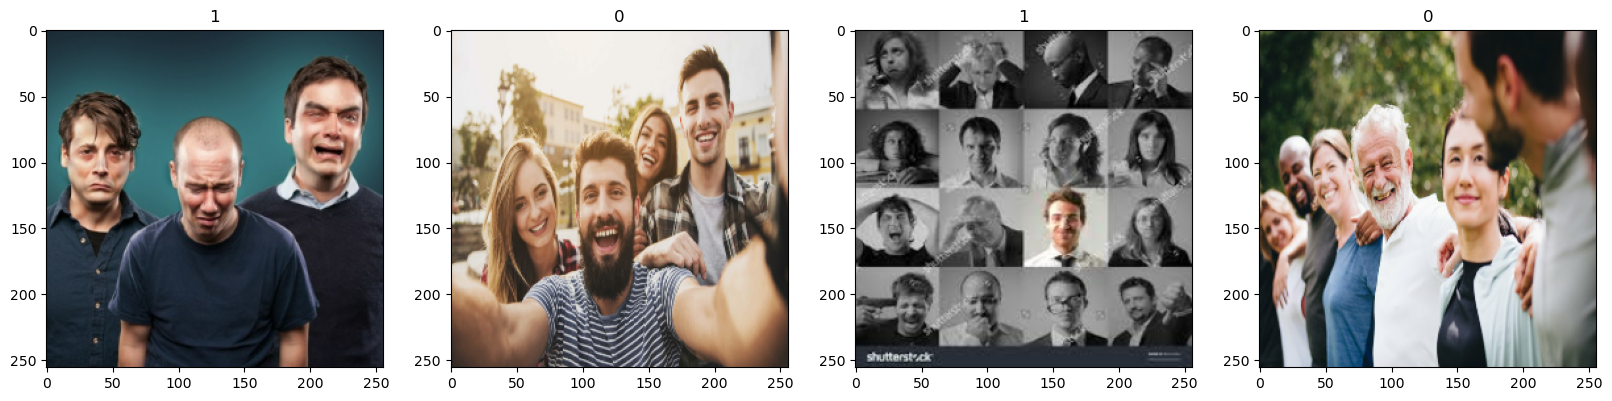

In [88]:
fig, ax = plt.subplots(ncols= 4, figsize = (20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

#### Splitting data

In [89]:
len(data) # 16 batches in the data

10

In [90]:
train_size = int(len(data) * .7)
val_size = int(len(data) * .2) + 1 
test_size = int(len(data) * .1) + 1

*Using `.skip`and `.take` to determine test, evaluation and train data*

In [91]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

## Deep Learning

### Building Deep Learning Model

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [93]:
model = Sequential()

In [94]:
model.add(Conv2D(16, (3, 3), 1, activation = "relu", input_shape = (256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation = "relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation = "relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = "relu"))

model.add(Dense(1, activation = "sigmoid"))

In [95]:
model.compile("adam", loss = tf.losses.BinaryCrossentropy(), metrics= ["accuracy"])

In [96]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

### Training the Deep Learning Model

Creating a log directory & callback to see how the model performs

In [97]:
logdir = "logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [98]:
hist = model.fit(train, epochs = 20, validation_data= val, callbacks= [tensorboard_callback])

Epoch 1/20


2024-05-23 15:30:34.783047: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.9432 - accuracy: 0.5804

2024-05-23 15:30:39.633915: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 7s 836ms/step - loss: 0.9432 - accuracy: 0.5804 - val_loss: 0.6914 - val_accuracy: 0.4842
Epoch 2/20


2024-05-23 15:30:41.501040: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.6331 - accuracy: 0.6518

2024-05-23 15:30:45.835683: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 6s 689ms/step - loss: 0.6331 - accuracy: 0.6518 - val_loss: 0.5864 - val_accuracy: 0.6842
Epoch 3/20


2024-05-23 15:30:47.260389: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.5922 - accuracy: 0.6384

2024-05-23 15:30:51.268960: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 5s 675ms/step - loss: 0.5922 - accuracy: 0.6384 - val_loss: 0.5229 - val_accuracy: 0.6526
Epoch 4/20


2024-05-23 15:30:52.658376: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.5376 - accuracy: 0.7634

2024-05-23 15:30:56.618666: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 5s 665ms/step - loss: 0.5376 - accuracy: 0.7634 - val_loss: 0.4961 - val_accuracy: 0.7579
Epoch 5/20


2024-05-23 15:30:58.010430: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.4493 - accuracy: 0.7634

2024-05-23 15:31:02.163185: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 6s 707ms/step - loss: 0.4493 - accuracy: 0.7634 - val_loss: 0.4138 - val_accuracy: 0.8737
Epoch 6/20


2024-05-23 15:31:03.702575: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.4034 - accuracy: 0.8348

2024-05-23 15:31:08.000270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 6s 702ms/step - loss: 0.4034 - accuracy: 0.8348 - val_loss: 0.2529 - val_accuracy: 0.9263
Epoch 7/20


2024-05-23 15:31:09.402530: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.3924 - accuracy: 0.8259

2024-05-23 15:31:13.904349: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 6s 771ms/step - loss: 0.3924 - accuracy: 0.8259 - val_loss: 0.3326 - val_accuracy: 0.8105
Epoch 8/20


2024-05-23 15:31:15.497773: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.3777 - accuracy: 0.8482

2024-05-23 15:31:19.606475: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 6s 678ms/step - loss: 0.3777 - accuracy: 0.8482 - val_loss: 0.3353 - val_accuracy: 0.8632
Epoch 9/20


2024-05-23 15:31:21.009884: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.3209 - accuracy: 0.8839

2024-05-23 15:31:24.992593: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 5s 679ms/step - loss: 0.3209 - accuracy: 0.8839 - val_loss: 0.2594 - val_accuracy: 0.9263
Epoch 10/20


2024-05-23 15:31:26.601118: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.2236 - accuracy: 0.9241

2024-05-23 15:31:30.921587: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 6s 718ms/step - loss: 0.2236 - accuracy: 0.9241 - val_loss: 0.2072 - val_accuracy: 0.9158
Epoch 11/20


2024-05-23 15:31:32.416479: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.2138 - accuracy: 0.9018

2024-05-23 15:31:36.648742: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 6s 716ms/step - loss: 0.2138 - accuracy: 0.9018 - val_loss: 0.1440 - val_accuracy: 0.9684
Epoch 12/20


2024-05-23 15:31:38.216088: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.1338 - accuracy: 0.9643

2024-05-23 15:31:42.970916: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 7s 857ms/step - loss: 0.1338 - accuracy: 0.9643 - val_loss: 0.1156 - val_accuracy: 0.9579
Epoch 13/20


2024-05-23 15:31:44.938431: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.0749 - accuracy: 0.9821

2024-05-23 15:31:50.153806: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 7s 791ms/step - loss: 0.0749 - accuracy: 0.9821 - val_loss: 0.0670 - val_accuracy: 0.9895
Epoch 14/20


2024-05-23 15:31:51.572010: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.0642 - accuracy: 0.9866

2024-05-23 15:31:55.574536: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 5s 672ms/step - loss: 0.0642 - accuracy: 0.9866 - val_loss: 0.0591 - val_accuracy: 0.9895
Epoch 15/20


2024-05-23 15:31:56.952984: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.0657 - accuracy: 0.9777

2024-05-23 15:32:00.923754: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 5s 669ms/step - loss: 0.0657 - accuracy: 0.9777 - val_loss: 0.0410 - val_accuracy: 0.9789
Epoch 16/20


2024-05-23 15:32:02.304982: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.0645 - accuracy: 0.9777

2024-05-23 15:32:06.248058: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 5s 662ms/step - loss: 0.0645 - accuracy: 0.9777 - val_loss: 0.0498 - val_accuracy: 1.0000
Epoch 17/20


2024-05-23 15:32:07.619484: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.0365 - accuracy: 0.9911

2024-05-23 15:32:11.677074: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 5s 678ms/step - loss: 0.0365 - accuracy: 0.9911 - val_loss: 0.0249 - val_accuracy: 1.0000
Epoch 18/20


2024-05-23 15:32:13.081915: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.0177 - accuracy: 1.0000

2024-05-23 15:32:17.070113: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 5s 674ms/step - loss: 0.0177 - accuracy: 1.0000 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 19/20


2024-05-23 15:32:18.466824: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.0165 - accuracy: 1.0000

2024-05-23 15:32:22.907339: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 6s 744ms/step - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 20/20


2024-05-23 15:32:24.489232: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.0107 - accuracy: 1.0000

2024-05-23 15:32:28.875468: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 6s 724ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000


Loss and accuracy info for training and validation

In [100]:
hist.history # loss and accuracy info for training and validation

{'loss': [0.943233847618103,
  0.6330832839012146,
  0.5921711325645447,
  0.5376109480857849,
  0.44928473234176636,
  0.4033908545970917,
  0.39241287112236023,
  0.37769657373428345,
  0.32085683941841125,
  0.2235957235097885,
  0.21379126608371735,
  0.13377602398395538,
  0.07489603012800217,
  0.06419425457715988,
  0.06574727594852448,
  0.06450251489877701,
  0.036485325545072556,
  0.017681743949651718,
  0.016495266929268837,
  0.01068623922765255],
 'accuracy': [0.5803571343421936,
  0.6517857313156128,
  0.6383928656578064,
  0.7633928656578064,
  0.7633928656578064,
  0.8348214030265808,
  0.8258928656578064,
  0.8482142686843872,
  0.8839285969734192,
  0.9241071343421936,
  0.9017857313156128,
  0.9642857313156128,
  0.9821428656578064,
  0.9866071343421936,
  0.9776785969734192,
  0.9776785969734192,
  0.9910714030265808,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.6913750171661377,
  0.5864123702049255,
  0.5228930711746216,
  0.4961433708667755,
  0.41377440094947815,
  0.

Plotting the model performance

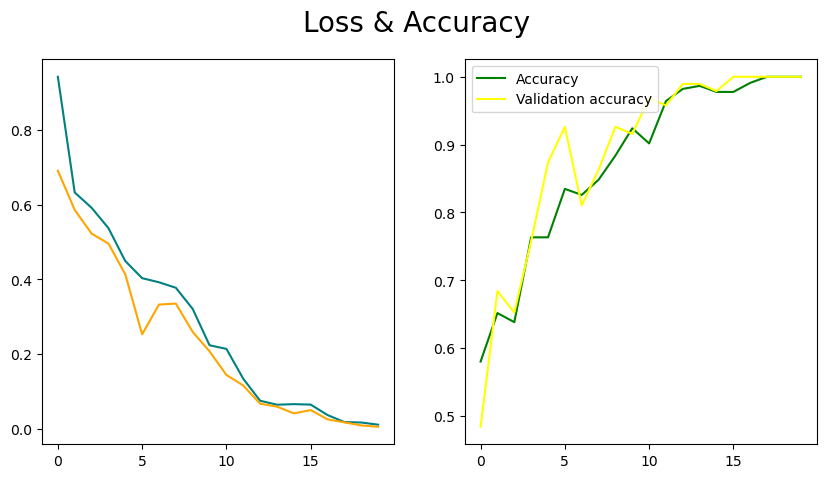

In [101]:
fig,ax = plt.subplots(ncols=2, figsize= (10,5))
ax[0].plot(hist.history["loss"], color = "teal", label = "Loss", )
ax[1].plot(hist.history["accuracy"], color = "green", label = "Accuracy")
ax[0].plot(hist.history["val_loss"], color = "orange", label = "Validation loss")
ax[1].plot(hist.history["val_accuracy"], color = "yellow", label = "Validation accuracy")
fig.suptitle("Loss & Accuracy", fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

### Performance Evaluation

#### Evaluate

In [102]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [103]:
precision = Precision()
recall = Recall()
acc = BinaryAccuracy()

In [104]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    acc.update_state(y, yhat)

2024-05-23 15:33:14.106094: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


In [105]:
print(f"Precision: {precision.result().numpy()},\nRecall: {recall.result().numpy()},\nAccuracy: {acc.result().numpy()}")

Precision: 0.0,
Recall: 0.0,
Accuracy: 0.0


#### Test

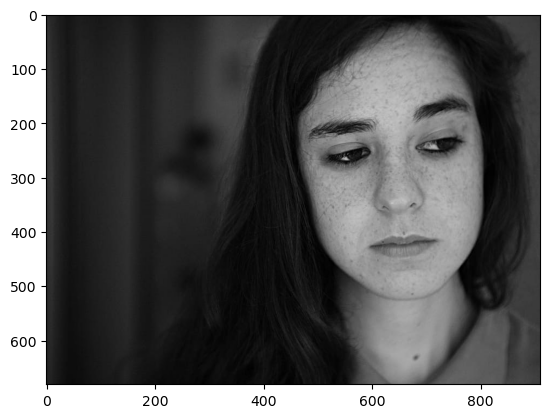

In [110]:
img = cv2.imread("sad_test.jpeg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

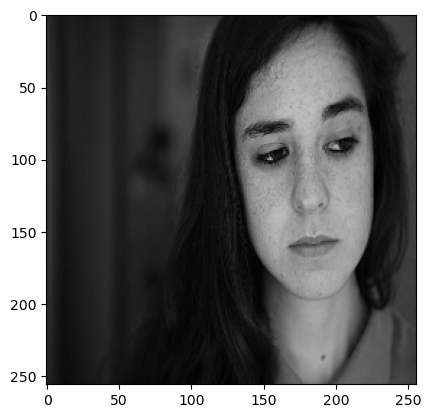

In [112]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [113]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 22ms/step


array([[0.99909216]], dtype=float32)

In [114]:
if yhat > .5:
    print("Predicted class is sad")
else:
    print("Predicted class is happy")

Predicted class is sad


## Saving the model

In [115]:
from tensorflow.keras.models import load_model

In [120]:
model.save(os.path.join("model", "happysadmodel.h5"))

/Users/iremarici/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [121]:
new_model = load_model(os.path.join("model","happysadmodel.h5"))

In [122]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 57ms/step


In [123]:
if yhat_new > .5:
    print("Predicted class is sad")
else:
    print("Predicted class is happy")

Predicted class is sad
